hits 10 overall
	0.3386: DE-wiki-complex-1
	0.0764: DE-wiki-complex-1-addition
	0.3485: Static-wiki-complex-1
	0.0572: Static-wiki-complex-1-addition
hits 3 overall
	0.2757: DE-wiki-complex-1
	0.0508: DE-wiki-complex-1-addition
	0.2868: Static-wiki-complex-1
	0.0407: Static-wiki-complex-1-addition
hits 1 overall
	0.1921: DE-wiki-complex-1
	0.0355: DE-wiki-complex-1-addition
	0.1949: Static-wiki-complex-1
	0.0313: Static-wiki-complex-1-addition
mrr overall
	0.2458: DE-wiki-complex-1
	0.0492: DE-wiki-complex-1-addition
	0.2512: Static-wiki-complex-1
	0.0407: Static-wiki-complex-1-addition


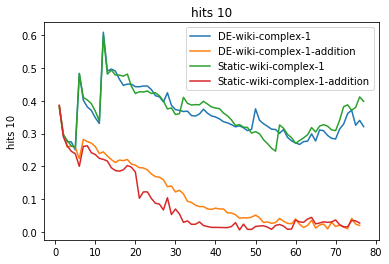

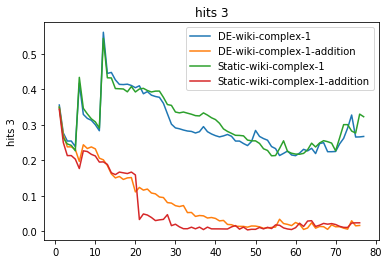

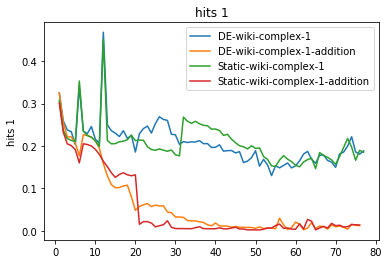

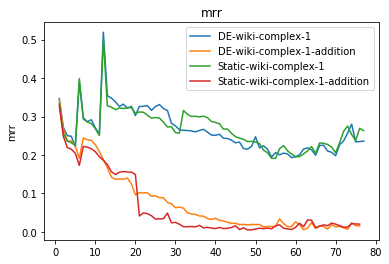

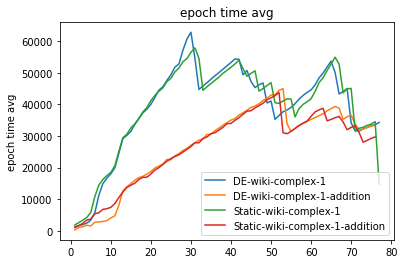

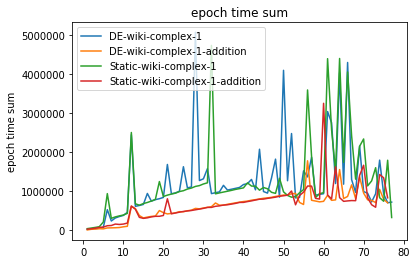

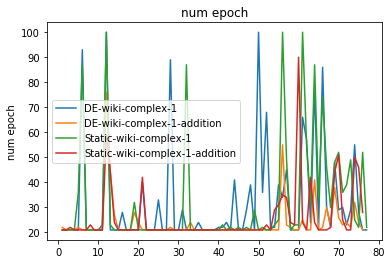

hits 10 overall
	0.2384: DE-yago-complex-1
	0.0277: DE-yago-complex-1-addition
	0.2442: Static-yago-complex-1
	0.0363: Static-yago-complex-1-addition
hits 3 overall
	0.1432: DE-yago-complex-1
	0.0167: DE-yago-complex-1-addition
	0.1527: Static-yago-complex-1
	0.0248: Static-yago-complex-1-addition
hits 1 overall
	0.0716: DE-yago-complex-1
	0.0095: DE-yago-complex-1-addition
	0.0841: Static-yago-complex-1
	0.0162: Static-yago-complex-1-addition
mrr overall
	0.1287: DE-yago-complex-1
	0.0167: DE-yago-complex-1-addition
	0.1385: Static-yago-complex-1
	0.0236: Static-yago-complex-1-addition


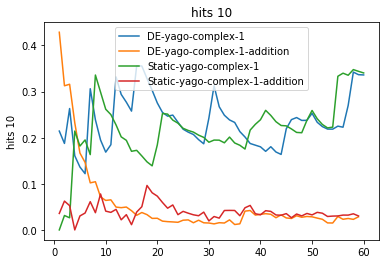

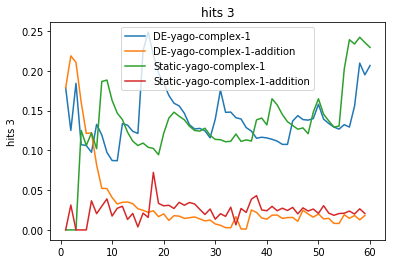

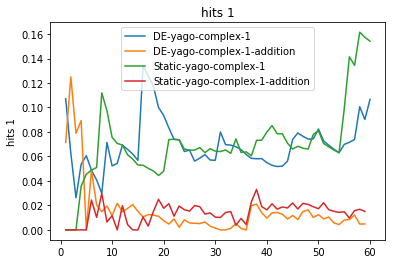

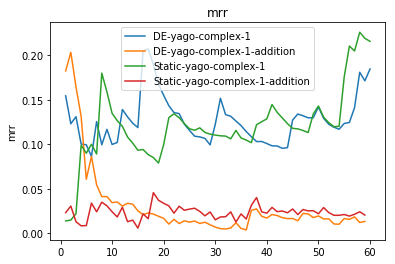

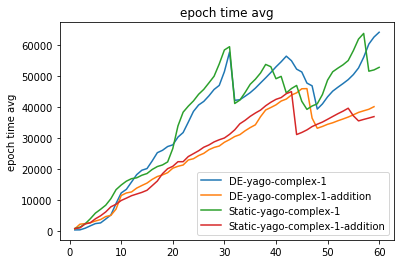

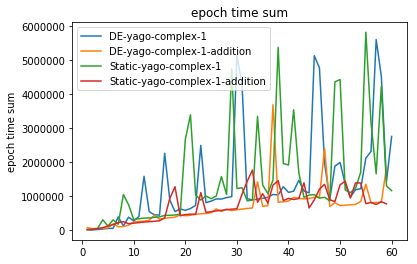

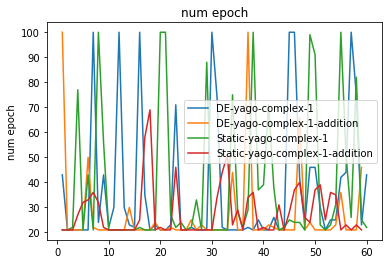

[None, None]

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
import pickle
import os

def plot_metrics(ylabel, metrics_dict_list, exp_names):
    
    for metrics_dict, exp_name in zip(metrics_dict_list, exp_names):
        plt.plot(metrics_dict.keys(), metrics_dict.values(), label=exp_name)
    plt.legend()
    plt.title(ylabel)
    plt.ylabel(ylabel)
    plt.show()
    plt.clf()

def load_metrics():
    metrics_dict_dict = {}
    for fname in fnames:
        with open(fname, 'rb') as fp:
            metrics_dict_dict[fname.split('/')[2]] = pickle.load(fp)
    return metrics_dict_dict

def merge_experiment_metrics(exp_names):
    metrics_to_merge = [metrics_dict_dict[exp_name] for exp_name in exp_names]
    keys = metrics_to_merge[0].keys()
    for k in keys:
        metrics_dict_list = [metrics[k] for metrics in metrics_to_merge]
        k = k.replace("_", " ")
        if type(metrics_dict_list[0]) == dict:
            plot_metrics(k, metrics_dict_list, exp_names)
        else:
            print(k)
            for metric_value, exp_name in zip(metrics_dict_list, exp_names):
                print('\t{:.4f}: {}'.format(metric_value, exp_name))


experiment_paths = [
                    'experiments/DE-wiki-complex-1/version_202007140007', 
                    'experiments/DE-wiki-complex-1-addition/version_202007140007',
                    'experiments/DE-yago-complex-1/version_202007140007',
                    'experiments/DE-yago-complex-1-addition/version_202007140007',
                    'experiments/Static-wiki-complex-1/version_202007140021',
                    'experiments/Static-wiki-complex-1-addition/version_202007140021',
                    'experiments/Static-yago-complex-1/version_202007140021',
                    'experiments/Static-yago-complex-1-addition/version_202007140021'
                   ]

fnames = [os.path.join('..', experiment_path, "metrics-per-snapshot.pt") for experiment_path in experiment_paths]
metrics_dict_dict = load_metrics()

experiments_to_merge_list = [
#                         ['DE-wiki-complex-1', 'DE-wiki-complex-1-addition'],
#                         ['DE-yago-complex-1', 'DE-yago-complex-1-addition'],
#                         ['Static-wiki-complex-1', 'Static-wiki-complex-1-addition'],
#                         ['Static-yago-complex-1', 'Static-yago-complex-1-addition'],
    ['DE-wiki-complex-1', 'DE-wiki-complex-1-addition', 'Static-wiki-complex-1', 'Static-wiki-complex-1-addition'],
    ['DE-yago-complex-1', 'DE-yago-complex-1-addition', 'Static-yago-complex-1', 'Static-yago-complex-1-addition'],
                       ]
[merge_experiment_metrics(experiments_to_merge) for experiments_to_merge in experiments_to_merge_list]
        

        